# Домашнее задание 4

### Выполнил Штанько Константин, группа 4

Для начала нам необходимо получить таблицу c данными. Для начала обозначим `расшифровку` каждого столбца для понимания того, что мы анализируем. Давайте выведем ее на экран:

In [136]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
import rpy2.robjects as robjects
from rpy2.robjects.packages import importr
utils = importr('utils')
cluster = importr('cluster')
from scipy.stats import f_oneway


data = pd.read_excel('russian_regions.xlsx', sheet_name='Data')

desc = pd.read_excel('russian_regions.xlsx', sheet_name='Description of data')
print("Таблица 1. Описание данных")
print(desc.to_string(index=False))

Таблица 1. Описание данных
                      Переменная                                                                       Описание переменной
                 Q_OF_LIFE_INDEX                                                                    РЕЙТИНГ КАЧЕСТВА ЖИЗНИ
                  AVERAGE_INCOME                                     СРЕДНЕДУШЕВЫЕ ДЕНЕЖНЫЕ ДОХОДЫ НАСЕЛЕНИЯ В МЕС. (руб.)
                             GRP                                                              ВРП НА ДУШУ НАСЕЛЕНИЯ (руб.)
            POP_PER_HOSPITAL_BED                       ЧИСЛЕННОСТЬ НАСЕЛЕНИЯ НА ОДНУ БОЛЬНИЧНУЮ КОЙКУ НА КОНЕЦ ГОДА (чел.)
                  POP_PER_DOCTOR                                                     ЧИСЛЕННОСТЬ НАСЕЛЕНИЯ НА ОДНОГО ВРАЧА
                   SICKNESS_RATE                                                   ЗАБОЛЕВАЕМОСТЬ (на 1000 чел. населения)
       ATMOSPHERIC_AIR_POLLUTION                             ВЫБРОСЫ ЗАГРЯЗНЯЮЩИХ ВЕЩЕСТВ В АТМОСФЕРНЫЙ ВОЗДУХ (

Теперь посмотрим на саму таблицу с данными, в которой содержатся `различные показатели по регионам России`:

In [14]:
data.head()

,REGION,Q_OF_LIFE_INDEX,AVERAGE_INCOME,GRP,POP_PER_HOSPITAL_BED,POP_PER_DOCTOR,SICKNESS_RATE,ATMOSPHERIC_AIR_POLLUTION,DISCHARGE_OF_POLLUTED_WASTEWATER,UNEMPLOYMENT_RATE,EMPLOYMENT_RATE,LABOR_RATE,ENTERPRISES_NUM,ENTERPRISES_NUM_GROWTH_RATE,FEM_WAGE,MALE_WAGE,WAGE_GENDER_GAP,FEM_SHARE_IN_EMPLOYEES,FEDERAL_OKRUG
0,Белгородская область,64.149,30778,506420.9,138.5,247.1,709.9,175,0.299145,4.9,0.225714,0.240952,33992.24750,1.137930,31105.842284,39966.872605,77.829063,52.25989,Центральный ФО
1,Брянская область,49.343,26585,253100.4,132.0,246.9,767.4,40,0.600000,4.0,0.236190,0.248571,18703.37125,0.880532,25282.041814,33424.005888,75.640370,55.08514,Центральный ФО
2,Владимирская область,50.967,23539,300273.6,119.9,286.4,919.2,42,0.811475,5.6,0.291905,0.300952,30494.11625,0.902246,30105.172162,39248.843377,76.703336,57.19788,Центральный ФО
3,Воронежская область,59.327,30289,370610.4,121.9,191.4,526.6,104,0.319892,4.3,0.284762,0.289524,51627.62375,0.924481,31127.016566,41131.373061,75.677067,54.69041,Центральный ФО
4,Ивановская область,47.754,24503,182398.1,122.0,226.0,902.5,22,0.487805,5.4,0.274286,0.296190,29030.24625,1.002322,24944.968012,31452.071954,79.311048,62.41403,Центральный ФО


In [15]:
data.describe()

,Q_OF_LIFE_INDEX,AVERAGE_INCOME,GRP,POP_PER_HOSPITAL_BED,POP_PER_DOCTOR,SICKNESS_RATE,ATMOSPHERIC_AIR_POLLUTION,DISCHARGE_OF_POLLUTED_WASTEWATER,UNEMPLOYMENT_RATE,EMPLOYMENT_RATE,LABOR_RATE,ENTERPRISES_NUM,ENTERPRISES_NUM_GROWTH_RATE,FEM_WAGE,MALE_WAGE,WAGE_GENDER_GAP,FEM_SHARE_IN_EMPLOYEES
count,81.000000,81.000000,8.100000e+01,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000
mean,48.063407,29103.975309,4.277426e+05,121.255556,218.074074,790.765432,210.703704,0.399817,7.122222,0.283674,0.305550,48811.850772,0.896640,34807.349236,46325.949121,76.133470,54.903409
std,11.436130,10907.045156,3.088424e+05,21.110880,40.129954,159.898472,403.671817,0.292327,4.121104,0.054079,0.058050,94022.928565,0.219001,13177.414658,17915.619872,7.271893,4.857662
min,19.105000,15603.000000,1.148441e+05,76.200000,123.100000,428.300000,1.000000,0.000000,2.600000,0.101905,0.116667,1098.500000,0.288545,22114.799304,23006.176368,59.464015,39.475590
25%,41.395000,23270.000000,2.531004e+05,109.600000,193.200000,685.600000,31.000000,0.130952,5.000000,0.259524,0.282857,14619.246250,0.815531,26653.970458,34568.902008,72.104932,52.598810
50%,48.063000,25888.000000,3.671382e+05,121.100000,218.700000,767.400000,84.000000,0.423313,5.900000,0.283810,0.303333,27372.493750,0.872834,31127.016566,41616.546397,75.614298,55.041500
75%,54.379000,30778.000000,4.533023e+05,131.100000,239.100000,905.700000,204.000000,0.572204,7.700000,0.315714,0.336190,42723.368750,0.977018,36825.279251,50519.846072,78.612332,57.197880
max,81.352000,78812.000000,1.900323e+06,225.500000,341.400000,1278.300000,2319.000000,1.168305,29.800000,0.465714,0.546667,779432.118750,2.354780,87822.617122,112419.904787,97.980853,65.233960


Проверим, нет ли `пропущенных значений`:

In [16]:
data.isna().sum()

REGION                              0
Q_OF_LIFE_INDEX                     0
AVERAGE_INCOME                      0
GRP                                 0
POP_PER_HOSPITAL_BED                0
POP_PER_DOCTOR                      0
SICKNESS_RATE                       0
ATMOSPHERIC_AIR_POLLUTION           0
DISCHARGE_OF_POLLUTED_WASTEWATER    0
UNEMPLOYMENT_RATE                   0
EMPLOYMENT_RATE                     0
LABOR_RATE                          0
ENTERPRISES_NUM                     0
ENTERPRISES_NUM_GROWTH_RATE         0
FEM_WAGE                            0
MALE_WAGE                           0
WAGE_GENDER_GAP                     0
FEM_SHARE_IN_EMPLOYEES              0
FEDERAL_OKRUG                       0
dtype: int64

Пропущенных значений **нет**, следовательно, можно идти дальше.

### **Задание 1:**

Выберем из общей таблицы те столбцы, с которыми мы будем работать:

In [137]:
df = data.select_dtypes(include=['number'])
df

,Q_OF_LIFE_INDEX,AVERAGE_INCOME,GRP,POP_PER_HOSPITAL_BED,POP_PER_DOCTOR,SICKNESS_RATE,ATMOSPHERIC_AIR_POLLUTION,DISCHARGE_OF_POLLUTED_WASTEWATER,UNEMPLOYMENT_RATE,EMPLOYMENT_RATE,LABOR_RATE,ENTERPRISES_NUM,ENTERPRISES_NUM_GROWTH_RATE,FEM_WAGE,MALE_WAGE,WAGE_GENDER_GAP,FEM_SHARE_IN_EMPLOYEES
0,64.149,30778,506420.9,138.5,247.1,709.9,175,0.299145,4.9,0.225714,0.240952,33992.24750,1.137930,31105.842284,39966.872605,77.829063,52.25989
1,49.343,26585,253100.4,132.0,246.9,767.4,40,0.600000,4.0,0.236190,0.248571,18703.37125,0.880532,25282.041814,33424.005888,75.640370,55.08514
2,50.967,23539,300273.6,119.9,286.4,919.2,42,0.811475,5.6,0.291905,0.300952,30494.11625,0.902246,30105.172162,39248.843377,76.703336,57.19788
3,59.327,30289,370610.4,121.9,191.4,526.6,104,0.319892,4.3,0.284762,0.289524,51627.62375,0.924481,31127.016566,41131.373061,75.677067,54.69041
4,47.754,24503,182398.1,122.0,226.0,902.5,22,0.487805,5.4,0.274286,0.296190,29030.24625,1.002322,24944.968012,31452.071954,79.311048,62.41403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,39.650,30937,332533.2,104.5,181.7,852.9,113,0.943662,6.0,0.327619,0.358571,15085.49375,1.092044,42265.904622,66846.650664,63.228156,46.95234
77,44.517,59774,1088347.4,84.3,156.8,657.6,29,0.130952,5.6,0.369048,0.448571,4287.75000,0.591495,74167.720029,89531.921709,82.839415,45.96691
78,52.643,53783,1577910.3,87.9,172.2,755.0,85,0.165563,5.5,0.416190,0.411905,15407.99250,0.943944,71632.502461,105064.551075,68.179516,48.24797
79,28.940,24696,322720.4,82.6,276.2,657.2,19,0.733333,6.3,0.276667,0.321429,2804.37500,0.892545,32697.059710,46301.964954,70.617002,56.09032


`Cтандартизируем` данные и построим `матрицу корреляций`:

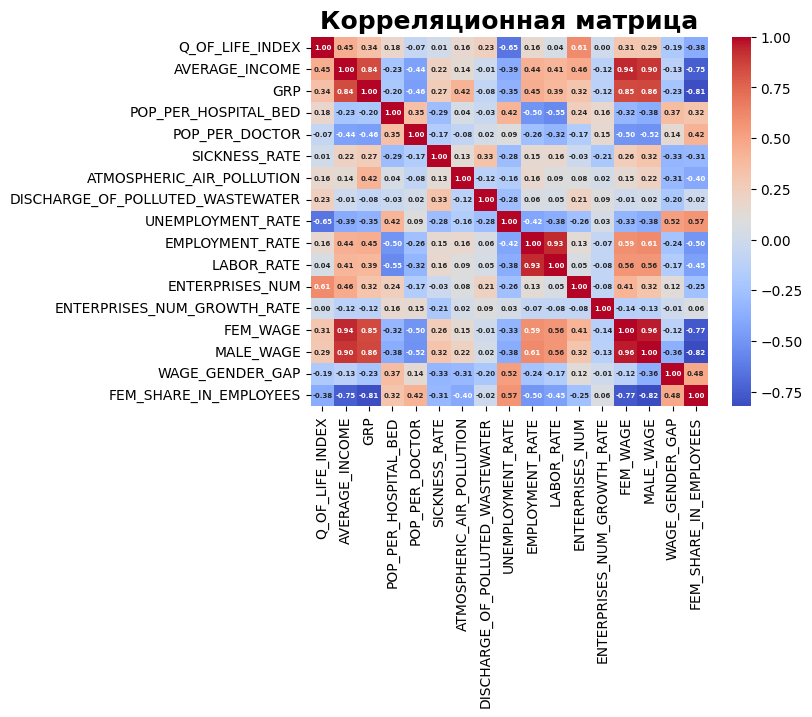

In [29]:
scaler = StandardScaler()
df1 = scaler.fit_transform(df)
new_df = pd.DataFrame(df1, columns=df.columns, index=df.index)
sns.heatmap(new_df.corr(), cmap='coolwarm', annot=True, fmt='.2f', annot_kws={'weight': 'bold', 'size': 5})
plt.title('Корреляционная матрица', fontsize=18, fontweight='bold')
plt.show()

Заметим, что признаки GRP, FEM_WAGE, MALE_WAGE, FEM_SHARE_IN_EMPLOYEES, LABOR_RATE сильно коррелируют с AVERAGE_INCOME, поэтому удалим их (AVERAGE_INCOME частично описывает эти признаки), чтобы евклидово расстояние можно было применять. Помимо этого, LABOR_RATE и EMPLOYMENT_RATE также связаны. Так как они отражают друг друга - удалим один из них (LABOR_RATE):

In [32]:
new_df.drop(columns=['GRP', 'FEM_WAGE', 'MALE_WAGE', 'FEM_SHARE_IN_EMPLOYEES', 'LABOR_RATE'], inplace=True)
new_df


,Q_OF_LIFE_INDEX,AVERAGE_INCOME,POP_PER_HOSPITAL_BED,POP_PER_DOCTOR,SICKNESS_RATE,ATMOSPHERIC_AIR_POLLUTION,DISCHARGE_OF_POLLUTED_WASTEWATER,UNEMPLOYMENT_RATE,EMPLOYMENT_RATE,ENTERPRISES_NUM,ENTERPRISES_NUM_GROWTH_RATE,WAGE_GENDER_GAP
0,1.415323,0.154437,0.821941,0.727805,-0.508881,-0.088998,-0.346527,-0.542590,-1.078434,-0.158599,1.108639,0.234623
1,0.112587,-0.232388,0.512124,0.722790,-0.147037,-0.425512,0.689059,-0.762338,-0.883509,-0.322220,-0.074013,-0.068232
2,0.255478,-0.513397,-0.064611,1.713225,0.808230,-0.420527,1.416988,-0.371674,0.153140,-0.196036,0.025757,0.078854
3,0.991050,0.109325,0.030717,-0.668834,-1.662376,-0.265980,-0.275112,-0.689089,0.020236,0.030134,0.127917,-0.063154
4,-0.027224,-0.424463,0.035483,0.198737,0.703138,-0.470381,0.302867,-0.420507,-0.174689,-0.211702,0.485568,0.439690
...,...,...,...,...,...,...,...,...,...,...,...,...
76,-0.740270,0.169106,-0.798638,-0.912055,0.391009,-0.243546,1.871994,-0.274008,0.817659,-0.360938,0.897808,-1.785742
77,-0.312038,2.829466,-1.761452,-1.536405,-0.838001,-0.452932,-0.925472,-0.371674,1.588500,-0.476496,-1.402029,0.927919
78,0.402945,2.276766,-1.589862,-1.150260,-0.225070,-0.313341,-0.806337,-0.396090,2.465665,-0.357487,0.217342,-1.100609
79,-1.682611,-0.406658,-1.842481,1.457467,-0.840518,-0.477859,1.148012,-0.200758,-0.130388,-0.492371,-0.018818,-0.763328


Можно заметить, что p-value настолько мал, что данный тест **отвергается** при любых уровнях значимости, следовательно, гипотеза о том, что матрица корреляций является единичной, отвергается. Таким образом, `PCA применим в данном случае`.

### **Задание 2:**

Обоснуем оптимальное число кластеров с помощью `метода локтя` и `силуэтного анализа`. По методу локтя, там, где график становится пологим, нужно отметить оптимальное количество кластеров, так как внутрикластерная вариация начинает уменьшаться несущественно. Силуэтный анализ же основан на измерении расстояния от точки кластера до всех точек своего кластера и соседнего. 

На основе этого формируется **силуэтный коэффициент**, который лежит в границах от -1 до +1 и выдает единицу, если разбиение оптимально, и минус единицу, если разбиение неоптимально. То есть надо найти такое количество кластеров, при котором силуэтный коэффициент будет максимальным.

Перейдем к построению этих методов на основе K-Means:

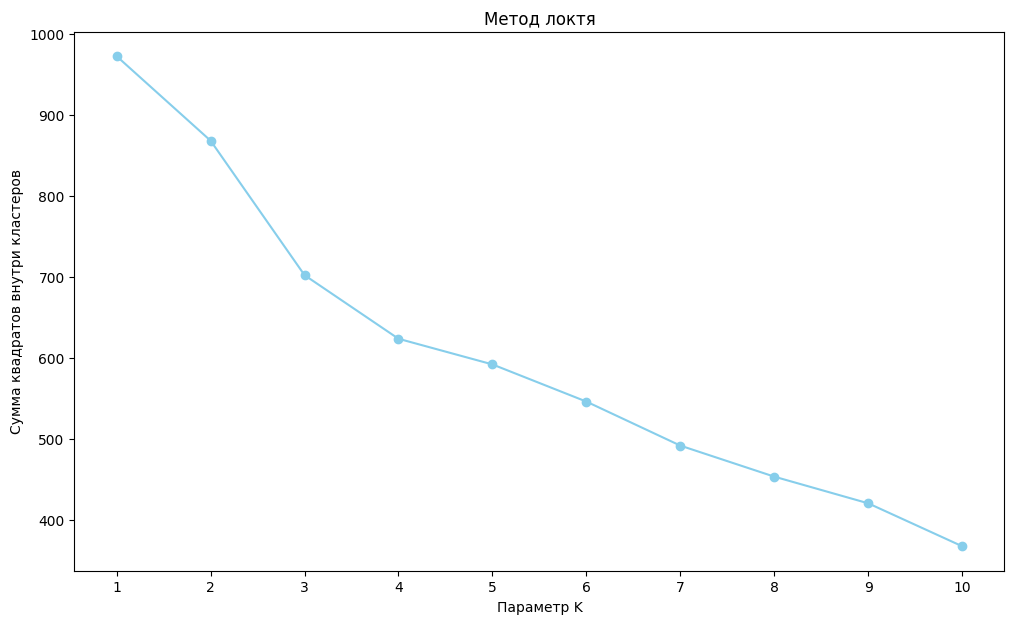

In [50]:
wss = list()
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=1)
    kmeans.fit(new_df)
    wss.append(kmeans.inertia_)

plt.figure(figsize=(12,7))
plt.plot(range(1, 11), wss, color='skyblue', marker='o')
plt.xticks(range(1,11))
plt.xlabel('Параметр K')
plt.ylabel('Сумма квадратов внутри кластеров')
plt.title('Метод локтя')
plt.show()

Заметим, что после K=3 график становится пологим, поэтому считаем, что `оптимальное количество кластеров в данном случае - 3`

In [66]:

import numpy as np

# Данные (y должен быть одномерным!)
X = np.array([[2, 4], [6, 8]], dtype=np.float64)
w = np.array([4, 3], dtype=np.float64)
for i in range(X.shape[0]):
   print(abs(np.dot(X[i], w)))

20.0
48.0


Силуэтный анализ выдает максимальное значение на K=3, следовательно, `оптимальное количество кластеров - 3`

### **Задание 3:**

Построим кластеризацию для методов `Варда` и `средней связи` и получим оптимальное число кластеров с помощью дельта-метода (максимальной разницы между кластерами на дендрограмме):

In [63]:
import sklearn
print(sklearn.__version__)

1.6.1


In [69]:

    sum = np.zeros((1, X.shape[1]))
sum

array([[0., 0.]])

Следовательно, метод `средней связи` дает результаты лучше, чем метод `Варда`, однако `результат все еще не очень хороший`, так как силуэтный коэффициент достигает 0.52 при максимальном значении 1. Помимо этого, получили схожие результаты по оптимальному числу кластеров: они составляют 2 и 3 соответственно для двух методов.

### **Задание 4:**

Сделаем иерархическую кластеризацию с помощью `дивизимного алгоритма`:

In [135]:
from rpy2.robjects import pandas2ri
pandas2ri.activate()
r_diana = cluster.diana(new_df, metric="euclidean", stand=True)
merge = np.array(r_diana.rx2("merge"))      
order = np.array(r_diana.rx2("order"))      
height = np.array(r_diana.rx2("height"))  
stats = importr("stats")
labels_r = stats.cutree(r_diana, k=3)
labels = np.array(labels_r)
silhouette_avg = silhouette_score(new_df, labels)
print(f"Силуэтный коэффициент: {silhouette_avg:.2f}")

Силуэтный коэффициент: 0.35


Таким образом, мы `получили силуэтный коэффициент 0.35`. Этот результат не превосходит агломеративные методы, следовательно, делаем вывод, что из 3 полученных результатов по разным методам кластеризации **лучшим оказался метод средней связи**.

### **Задание 5:**

Построим `K-Means` с гиперпараметром `K=3` и получим силуэтный коэффициент для оценки кластеризации:

In [202]:
df2 = pd.DataFrame(df1, columns=df.columns, index=df.index)
cl = KMeans(n_clusters=3, n_init=10, random_state=1)
clusters = cl.fit_predict(df2)
df2['Cluster'] = clusters + 1
cluster_means = df2.groupby('Cluster').mean().reset_index()
silhouette2 = np.round(silhouette_score(new_df, df2['Cluster']), 2)
print(f'Силуэтный коэффициент: {float(silhouette2)}')




Силуэтный коэффициент: 0.34


Таким образом, оценка кластеризации по методу K-Means несильно отличается от предыдущих иерархических методов, следовательно, делаем вывод, что `кластеризация с данным набором признаков работает плохо`.

Теперь построим `график средних для 3 полученных кластеров`:

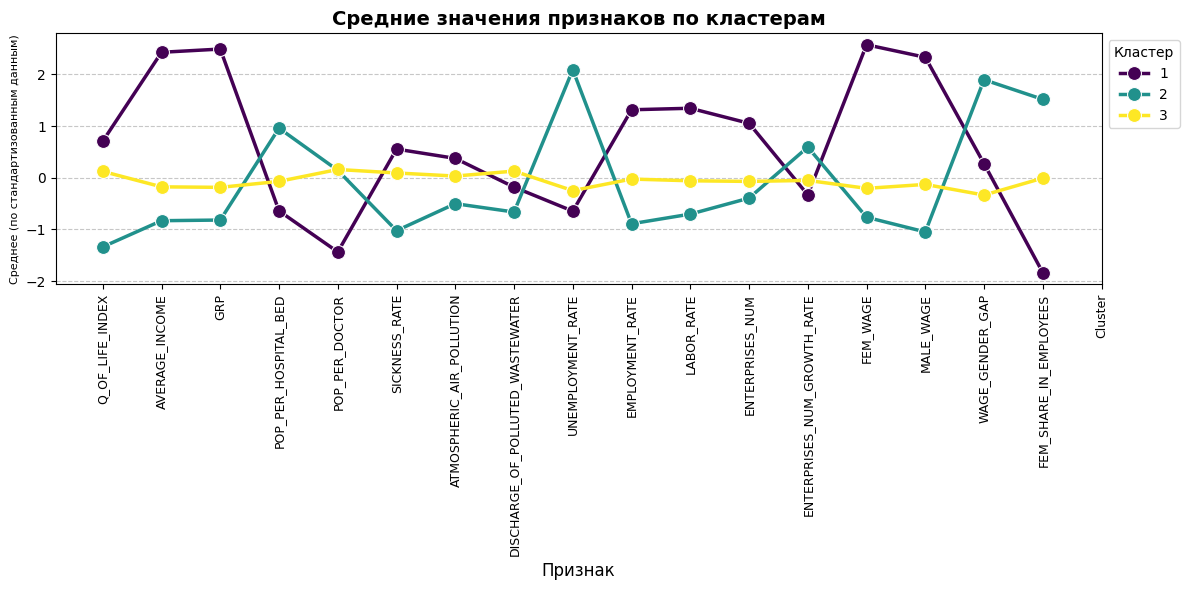

In [203]:
melted_data = pd.melt(cluster_means, 
                     id_vars="Cluster", 
                     var_name="Признак", 
                     value_name="Среднее значение")
plt.figure(figsize=(12, 6))
sns.lineplot(data=melted_data, 
            x="Признак", 
            y="Среднее значение", 
            hue="Cluster", 
            marker="o",
            linewidth=2.5,
            markersize=10,
            palette="viridis")
plt.title("Средние значения признаков по кластерам", fontsize=14, fontweight='bold')
plt.xlabel("Признак", fontsize=12)
plt.ylabel("Среднее (по стандартизованным данным)", fontsize=8)
plt.xticks(df2.columns, rotation=90, fontsize=9)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.legend(title="Кластер", bbox_to_anchor=(1, 1), loc="upper left")

plt.tight_layout()
plt.show()

Можно заметить, что для некоторых признаков (DISCHARGE_OF_POLLUTED_WASTEWATER и ENTERPRISES_NUM_GROWTH_RATE) средние несильно отличаются, следовательно, они не вносят особый вклад в кластеризацию. Наоборот же, по ВВП, уровню зарплат и индексом качества жизни можно выделить разницу в разных кластерах.

Чтобы статистически убедиться в выводах, проведем `ANOVA-тест` на равенство средних:

In [201]:
anova = {}
for column in df2.columns[:-1]:
    groups = [df2[column][df2['Cluster'] == cluster] for cluster in df2['Cluster'].unique()]
    f_stat, p_value = f_oneway(*groups)
    anova[column] = {'F-value': f_stat, 'p-value': p_value}

anova_df = pd.DataFrame(anova).T
anova_df

,F-value,p-value
Q_OF_LIFE_INDEX,15.317584,2.448174e-06
AVERAGE_INCOME,87.342307,1.233435e-20
GRP,101.175367,2.144487e-22
POP_PER_HOSPITAL_BED,7.321726,1.218751e-03
POP_PER_DOCTOR,11.384110,4.592717e-05
SICKNESS_RATE,7.787754,8.248288e-04
ATMOSPHERIC_AIR_POLLUTION,1.870215,1.609347e-01
DISCHARGE_OF_POLLUTED_WASTEWATER,2.953457,5.801996e-02
UNEMPLOYMENT_RATE,66.046121,1.650817e-17
EMPLOYMENT_RATE,14.366446,4.875921e-06


Таким образом, при уровне значимости `0.05` получим, что F-критерий не отвергается только для признаков загрязнения воздуха, роста числа предприятий и слива водных отходов. Следовательно, только для них различия между кластерами **статистически несущественны**. 

Для остальных признаков, разница между кластерами **существенна**.